## SCRAPING SITO DEL CENTRO RICERCA CER

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://www.centroeuroparicerche.it/about/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
About Us | CER – Centro Europa Ricerche


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
res

['https://www.centroeuroparicerche.it/categorie_rapporti/osservatorio-covid-19/',
 'https://www.centroeuroparicerche.it/about',
 'https://twitter.com/CEReconomia',
 'https://www.centroeuroparicerche.it/attivita/',
 'https://www.centroeuroparicerche.it/privacy-policy/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/current-issues/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/rubrica-del-mercato-petrolifero/',
 'https://www.facebook.com/cer.centroeuroparicerche',
 'https://www.centroeuroparicerche.it/chi-siamo/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/ricerche-di-mercato/',
 'https://www.centroeuroparicerche.it/blog/news/',
 'https://www.centroeuroparicerche.it/attivita/ricerche-di-mercato/',
 'https://www.centroeuroparicerche.it/attivita/rapporti-periodici/',
 'https://www.centroeuroparicerche.it/attivita/competenze-e-aree-di-ricerca/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/ricerchepassate/',
 'https://www.centroeuroparicerch

In [4]:
lista_url2 = list(filter(lambda x: x.startswith('https://www.centroeuroparicerche.it/categorie_rapporti/'), res))
lista_url2=list(set(lista_url2))
lista_url2

['https://www.centroeuroparicerche.it/categorie_rapporti/rapporti-cer/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/osservatorio-covid-19/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/geopolitica-dellenergia/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/la-congiuntura-internazionale/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/current-issues/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/rubrica-del-mercato-petrolifero/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/ricerchepassate/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/rapporto-cer-aggiornamenti/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/ricerche-di-mercato/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/rapporti-banche/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/rapporto-banche-aggiornamenti/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/la-congiuntura-italiana/']

In [5]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"site-content"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Rapporto CER | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'Osservatorio Covid-19 | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'Geopolitica dell’energia | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'La congiuntura internazionale | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'CURRENT ISSUES | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'Rubrica del Mercato Petrolifero | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'Altre ricerche | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'Rapporto CER Aggiornamenti | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'Ricerche di mercato | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'Rapporto BANCHE | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'Rapporto BANCHE Aggiornamenti | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'La congiuntura i

In [6]:
texts[0]

'\n\n\nHomePageRapporto CER \n\n\n\n\n\n\n\n\t\t\t\t\tRapporto CER\t\t\t\t\n\n\n\n\nRapporto CER 2/2020\n\nPubblicato il 24 Novembre 2020 \n\t\t\t\tArchiviato in: Rapporti CER 2020\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPiù Info →\n\n\n\n\n\n\n\n\nRapporto CER 1/2020\n\nPubblicato il 3 Settembre 2020 \n\t\t\t\tArchiviato in: Rapporti CER 2020\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPiù Info →\n\n\n\n\n\n\n\n\nRapporto CER 4/2019\n\nPubblicato il 19 Maggio 202025 Maggio 2020 \n\t\t\t\tArchiviato in: Rapporti CER 2019\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPiù Info →\n\n\n\n\n\n\n\n\nRapporto CER 3/2019\n\nPubblicato il 1 Aprile 2020 \n\t\t\t\tArchiviato in: Rapporto CER, Rapporti CER 2019\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPiù Info →\n\n\n\n\n\n\n\n\nRapporto CER 2/2019\n\nPubblicato il 9 Dicembre 20199 Dicembre 2019 \n\t\t\t\tArchiviato in: Rapporti CER 2019\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPiù Info →\n\n\n\n\n\n\n\n\nRapporto CER 1/2019\n\nPubblicato il 2 Agosto 2019 \n\t\t\t\tArchiviato in: Rapporti CER 2019\n\n\n

In [7]:
texts2 = []    
for element in texts:
    texts2.append(element.replace('\n',''))

#print(texts2)

In [8]:
texts2[0]

'HomePageRapporto CER \t\t\t\t\tRapporto CER\t\t\t\tRapporto CER 2/2020Pubblicato il 24 Novembre 2020 \t\t\t\tArchiviato in: Rapporti CER 2020Più Info →Rapporto CER 1/2020Pubblicato il 3 Settembre 2020 \t\t\t\tArchiviato in: Rapporti CER 2020Più Info →Rapporto CER 4/2019Pubblicato il 19 Maggio 202025 Maggio 2020 \t\t\t\tArchiviato in: Rapporti CER 2019Più Info →Rapporto CER 3/2019Pubblicato il 1 Aprile 2020 \t\t\t\tArchiviato in: Rapporto CER, Rapporti CER 2019Più Info →Rapporto CER 2/2019Pubblicato il 9 Dicembre 20199 Dicembre 2019 \t\t\t\tArchiviato in: Rapporti CER 2019Più Info →Rapporto CER 1/2019Pubblicato il 2 Agosto 2019 \t\t\t\tArchiviato in: Rapporti CER 2019Più Info →Rapporto CER 4/2018Pubblicato il 15 Aprile 201910 Maggio 2019 \t\t\t\tArchiviato in: Rapporti CER 2018Più Info →Rapporto CER 3/2018Pubblicato il 17 Dicembre 2018 \t\t\t\tArchiviato in: Rapporti CER 2018Più Info →Rapporto CER 2/2018Pubblicato il 27 Luglio 201830 Luglio 2018 \t\t\t\tArchiviato in: Rapporti CER 2018

In [9]:
import nltk
words = set(nltk.corpus.words.words())

texts3 = []    
for element in texts2:
    element= " ".join(w for w in nltk.wordpunct_tokenize(element) if w.lower() in words or not w.isalpha())
    texts3.append(element)

In [10]:
texts3[0]

'2 / 2020Pubblicato 24 2020 in : 2020Più → 1 / 2020Pubblicato 3 2020 in : 2020Più → 4 / 2019Pubblicato 19 202025 2020 in : 2019Più → 3 / 2019Pubblicato 1 2020 in : , 2019Più → 2 / 2019Pubblicato 9 20199 2019 in : 2019Più → 1 / 2019Pubblicato 2 2019 in : 2019Più → 4 / 2018Pubblicato 15 201910 2019 in : 2018Più → 3 / 2018Pubblicato 17 2018 in : 2018Più → 2 / 2018Pubblicato 27 201830 2018 in : 2018Più → 1 / 2018Pubblicato 1 20186 2018 in : 2018Più → : 1234567891011 ... 17 » - 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001 2000 + 1999 - 1982Rapporti 1999 1998 1997 1996 1995 1994 1993 1992 1991 1990 1989 1988 1987 + 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 dell ’ La La Covid - 19 Rubrica CURRENT di + + 2010 2009 2008 2007 2006 2005 2004 2003 2002 + di “ ” Rap . per Rap . per + di - - - + - Terzo Quarto Quinto - - // <![ [/* These are part of the * Version : 2 . 2 . 7 * $

### TEXT CLEANING

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

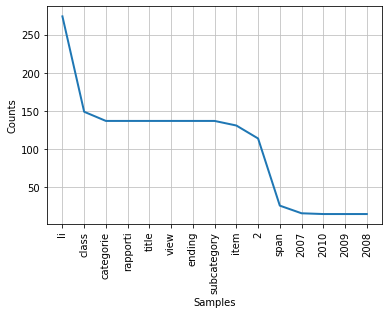

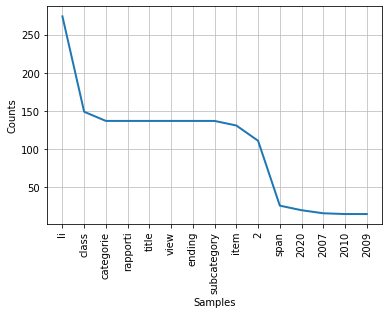

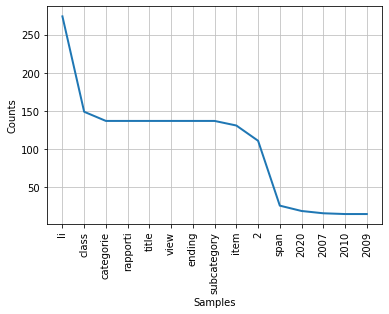

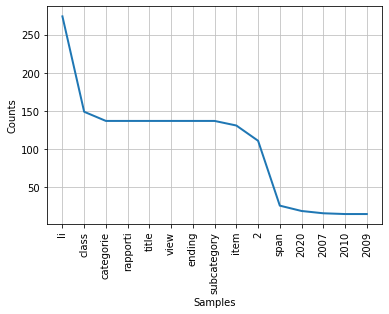

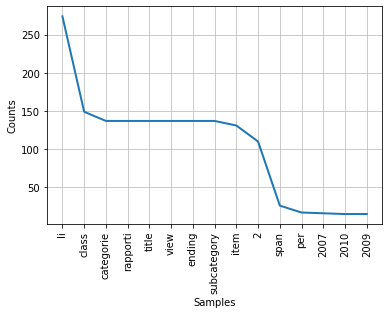

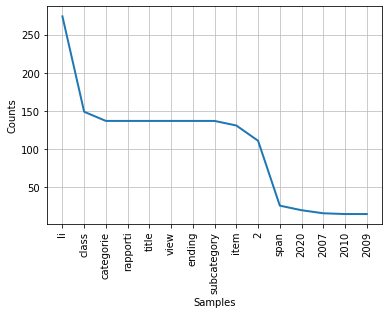

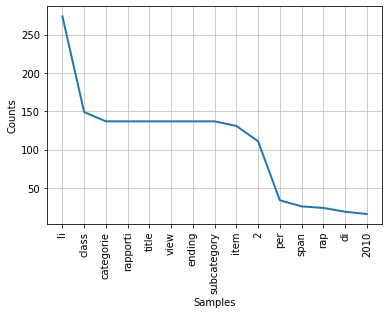

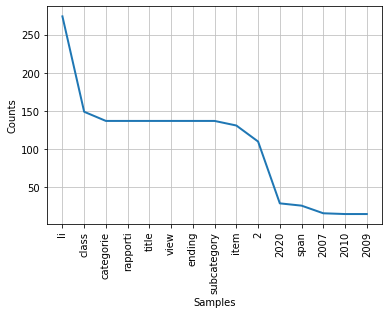

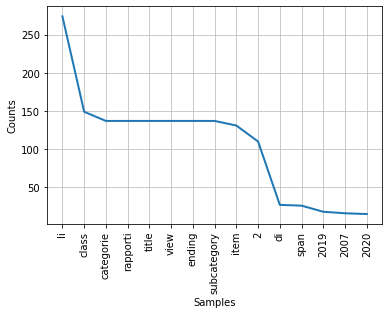

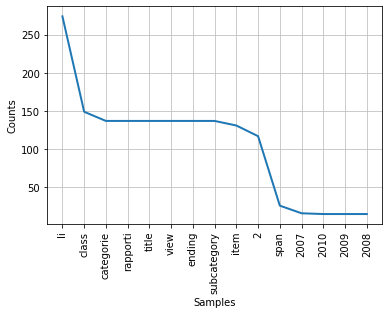

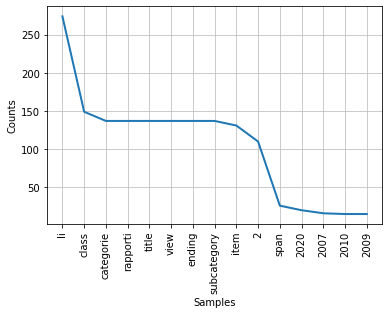

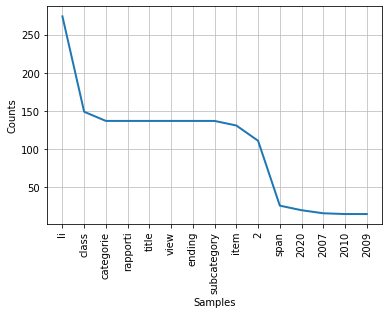

In [13]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts3[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [14]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

,Title,Freq_word
0,Rapporto CER | Categorie Rapporti e Ricerche |...,"{'2': 114, '2020pubblicato': 2, '24': 2, '2020..."
1,Osservatorio Covid-19 | Categorie Rapporti e R...,"{'covid': 13, '19': 3, 'n': 10, '14': 2, '23':..."
2,Geopolitica dell’energia | Categorie Rapporti ...,"{'dell': 12, 'n': 9, '9': 1, '2020pubblicato':..."
3,La congiuntura internazionale | Categorie Rapp...,"{'la': 13, 'n': 10, '11': 2, '2020pubblicato':..."
4,CURRENT ISSUES | Categorie Rapporti e Ricerche...,"{'current': 9, 'di': 12, 'e': 2, 'ai': 1, 'tem..."
5,Rubrica del Mercato Petrolifero | Categorie Ra...,"{'rubrica': 12, 'n': 10, '10': 1, '2020pubblic..."
6,Altre ricerche | Categorie Rapporti e Ricerche...,"{'di': 19, 'per': 34, '2014pubblicato': 1, '2'..."
7,Rapporto CER Aggiornamenti | Categorie Rapport...,"{'misery': 9, 'index': 9, '2020': 29, '10': 1,..."
8,Ricerche di mercato | Categorie Rapporti e Ric...,"{'di': 27, '2020': 15, 'foreign': 2, 'report':..."
9,Rapporto BANCHE | Categorie Rapporti e Ricerch...,"{'1': 11, '2020pubblicato': 1, '15': 1, '20201..."


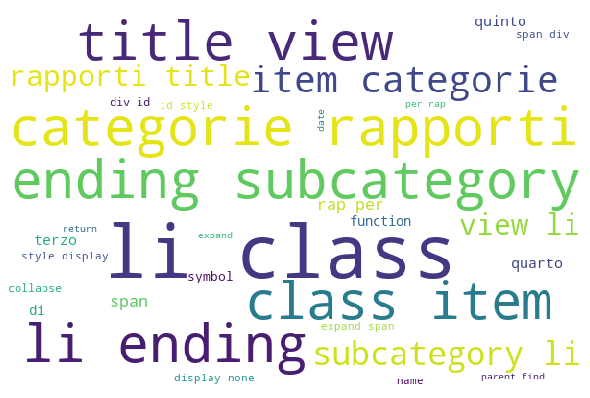

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[0]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

In [16]:
tot_text = ''.join(map(str, clean_texts))
tot_text = ''.join(i for i in tot_text if not i.isdigit())
type(tot_text)

str

In [17]:
tot_text=' '.join( [w for w in tot_text.split() if len(w)>1] )

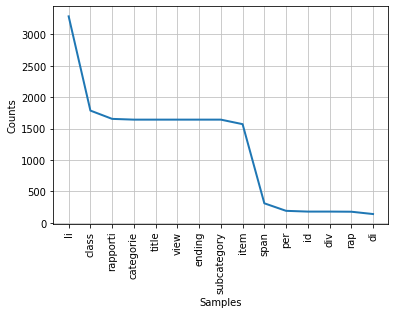

In [18]:
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

**salvo la stringa contenente il contenuto di tutte le pagine del sito in un file a parte**

In [19]:
textfile = open('CER.txt', 'w')
textfile.write(tot_text)
textfile.close()

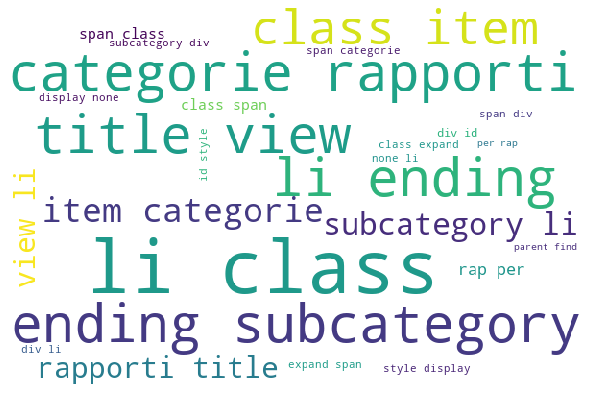

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()